# Setup

In [1]:
# Import packages
import pandas as pd
from ds_common_utils.aux.io.snowflake_tools import SnowflakeTools
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Setup connection
con = SnowflakeTools(
    role="INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD",
    warehouse="INSIGHT_ANALYST_WH",
    database="BDWPRD_DE",
    schema="IA_MERCH_DE"
)

In [3]:
# Date range
start_date = "'2024-06-18'"
end_date = "'2025-06-18'"

In [4]:
# Updated function with `field` for demographic segment and `level` for groupings like sub-department
def generate_segment_charts(df, field, level):
    sub_charts = {}
    segment_order = df[field].drop_duplicates().tolist()

    for group_val in df[level].drop_duplicates():
        df_sub = df[df[level] == group_val].copy()

        df_sub[field] = pd.Categorical(df_sub[field], categories=segment_order, ordered=True)
        df_sub.sort_values(field, inplace=True)

        def get_color(index):
            if index > 1.2:
                return "green"
            elif index < 0.8:
                return "red"
            else:
                return "grey"

        colors = df_sub["SALES_INDEX"].apply(get_color)

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.barh(range(len(df_sub)), df_sub["SEGMENT_SALES"] / 1e6, color=colors)

        ax.set_yticks(range(len(df_sub)))
        ax.set_yticklabels(df_sub[field])

        for i, bar in enumerate(bars):
            idx_val = df_sub.iloc[i]["SALES_INDEX"]
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{idx_val:.2f}",
                    va='center', ha='left', fontsize=10, color=colors.iloc[i])

        ax.set_title(f"Sales by {field}\n{group_val}")
        ax.set_xlabel("Sales ($M)")

        # Only keep left and bottom borders
        for spine_name in ["top", "right"]:
            ax.spines[spine_name].set_visible(False)

        plt.tight_layout()
        sub_charts[group_val] = fig

    return sub_charts

# 300 PEST CONTROL

## Data

In [5]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [6]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_department_name = '300 PEST CONTROL' "})

snowflake_tools - 2025-06-19 21:48:11.545684+10:00 - Generating new token with 'INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD' role and 'SESSION:ROLE-ANY' scope...
snowflake_tools - 2025-06-19 21:48:17.644035+10:00 - Saved token with '2025-06-20 01:48:17+10:00' expiry...


## Demographic Segments (AU)

In [7]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [8]:
# Check data
PC_ds.head(7)

,ITEM_SUB_DEPARTMENT_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,Homeowner older kids,142267.22,6490.0,4711,2003863.09,93283.0,66658,4454030.85,375149.0,...,1637108,0.070996,0.069573,0.070674,0.079992,0.077637,0.075973,0.887540,0.896132,0.930252
1,400 ANIMAL CONTROL,Homeowner younger kids,286179.76,12781.0,9280,2003863.09,93283.0,66658,9915695.67,810303.0,...,1637108,0.142814,0.137013,0.139218,0.178081,0.167693,0.162289,0.801959,0.817050,0.857840
2,400 ANIMAL CONTROL,Older homeowner,1092302.00,51747.0,36312,2003863.09,93283.0,66658,24695826.85,2190508.0,...,1637108,0.545098,0.554731,0.544751,0.443526,0.453326,0.435847,1.229010,1.223690,1.249867
3,400 ANIMAL CONTROL,Renter no kids,118663.40,5535.0,4257,2003863.09,93283.0,66658,4832988.20,444158.0,...,1637108,0.059217,0.059336,0.063863,0.086798,0.091919,0.112929,0.682240,0.645523,0.565515
4,400 ANIMAL CONTROL,Renter with kids,107385.39,4928.0,3734,2003863.09,93283.0,66658,4414681.00,397124.0,...,1637108,0.053589,0.052828,0.056017,0.079286,0.082185,0.091459,0.675900,0.642800,0.612482
5,400 ANIMAL CONTROL,Unclassifiable,18236.59,823.0,578,2003863.09,93283.0,66658,407141.30,36614.0,...,1637108,0.009101,0.008823,0.008671,0.007312,0.007577,0.007732,1.244615,1.164351,1.121443
6,400 ANIMAL CONTROL,Younger homeowner,238828.73,10979.0,7786,2003863.09,93283.0,66658,6960308.42,578220.0,...,1637108,0.119184,0.117696,0.116805,0.125004,0.119663,0.113771,0.953443,0.983560,1.026668


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

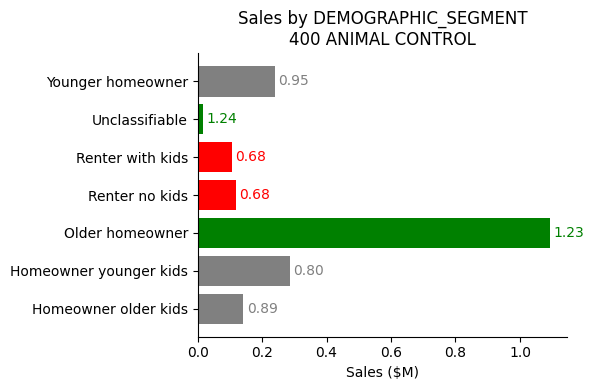

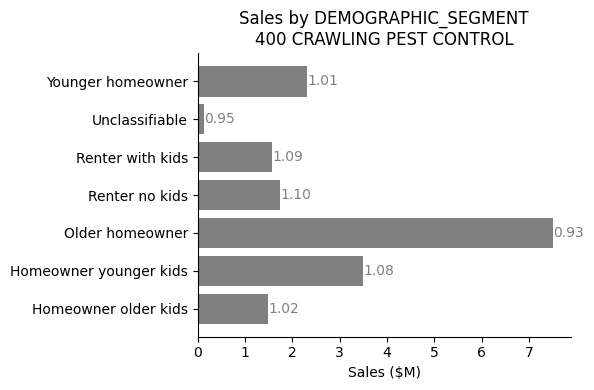

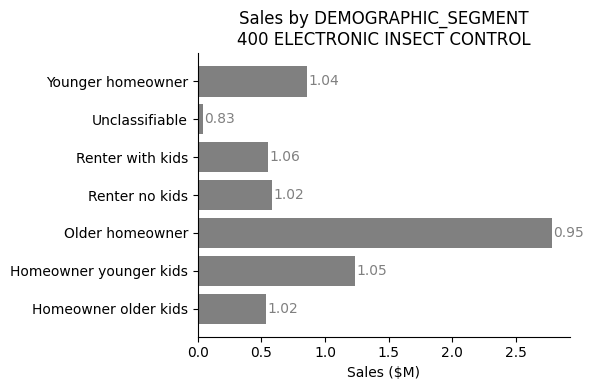

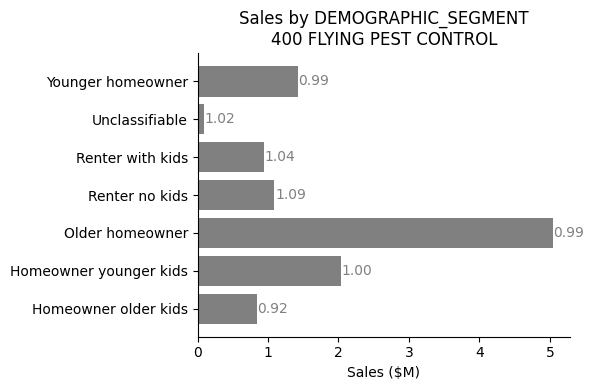

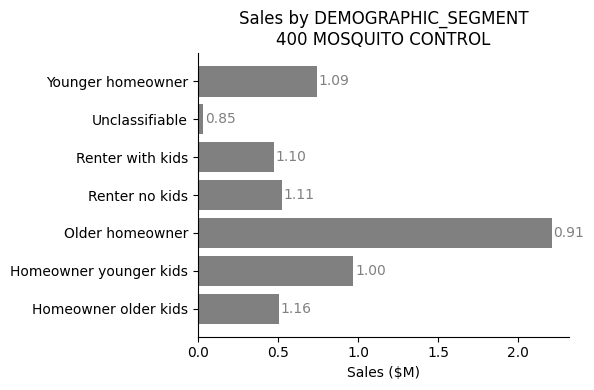

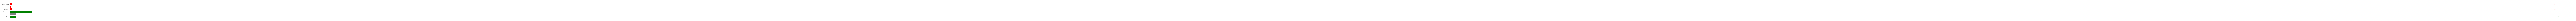

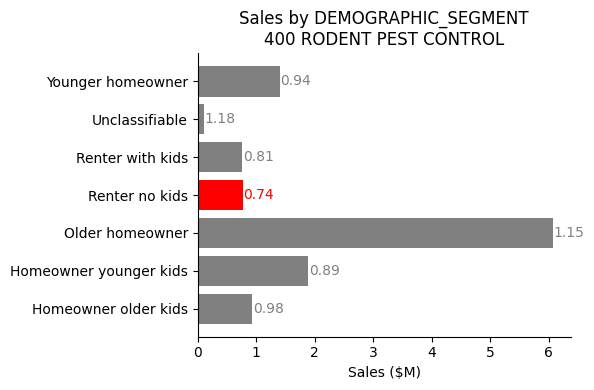

In [9]:
generate_segment_charts(df=PC_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## DIY

In [10]:
# Get data
PC_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [11]:
# Check data
PC_diy.head(7)

,ITEM_SUB_DEPARTMENT_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,DIY Maintainer,480774.06,22917.0,16321,1768268.76,82641.0,58926,12532062.18,1106992.0,...,1375961,0.271890,0.277308,0.276975,0.260157,0.265380,0.267331,1.045099,1.044948,1.036075
1,400 ANIMAL CONTROL,DIY Master,405377.57,17266.0,12325,1768268.76,82641.0,58926,12149191.36,999248.0,...,1375961,0.229251,0.208928,0.209161,0.252209,0.239550,0.227660,0.908974,0.872167,0.918743
2,400 ANIMAL CONTROL,DIY Rookie,385434.73,19681.0,14147,1768268.76,82641.0,58926,9743544.08,890774.0,...,1375961,0.217973,0.238151,0.240081,0.202269,0.213546,0.229739,1.077638,1.115221,1.045016
3,400 ANIMAL CONTROL,DIY Skilled,496682.40,22777.0,16133,1768268.76,82641.0,58926,13746373.22,1174338.0,...,1375961,0.280886,0.275614,0.273784,0.285365,0.281525,0.275270,0.984305,0.979004,0.994602
4,400 CRAWLING PEST CONTROL,DIY Maintainer,4057582.22,328344.0,170755,15585425.40,1238771.0,636397,12532062.18,1106992.0,...,1375961,0.260345,0.265056,0.268315,0.260157,0.265380,0.267331,1.000722,0.998781,1.003681
5,400 CRAWLING PEST CONTROL,DIY Master,3950278.96,298085.0,145538,15585425.40,1238771.0,636397,12149191.36,999248.0,...,1375961,0.253460,0.240630,0.228691,0.252209,0.239550,0.227660,1.004960,1.004506,1.004529
6,400 CRAWLING PEST CONTROL,DIY Rookie,3108046.71,262766.0,143539,15585425.40,1238771.0,636397,9743544.08,890774.0,...,1375961,0.199420,0.212118,0.225549,0.202269,0.213546,0.229739,0.985914,0.993316,0.981762


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

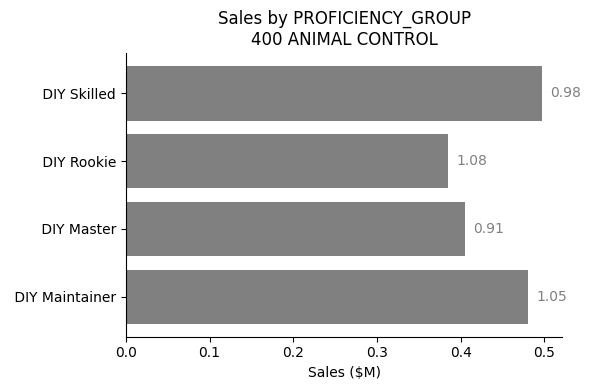

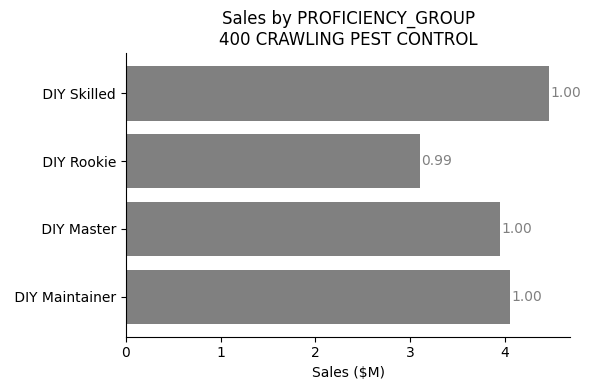

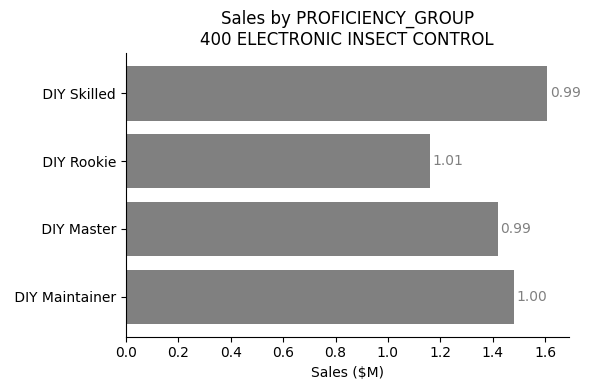

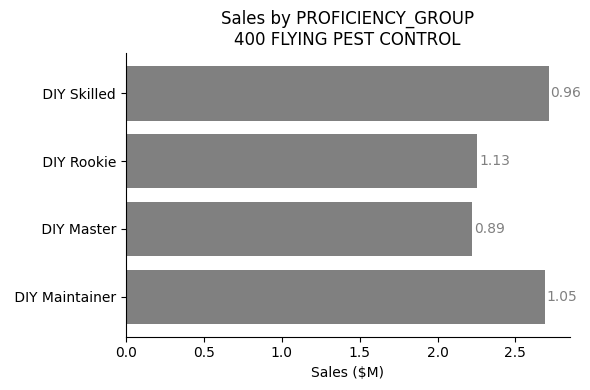

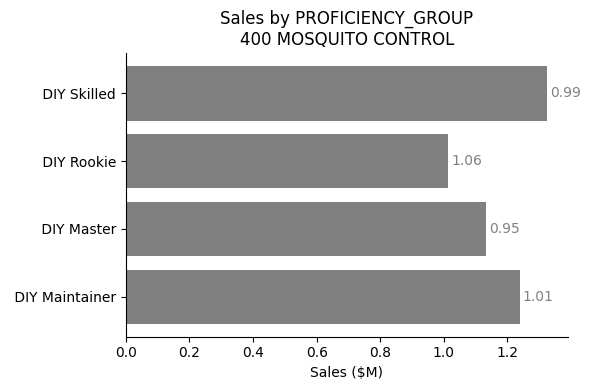

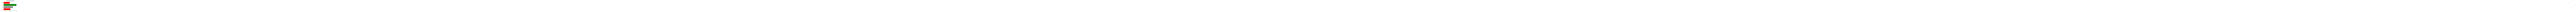

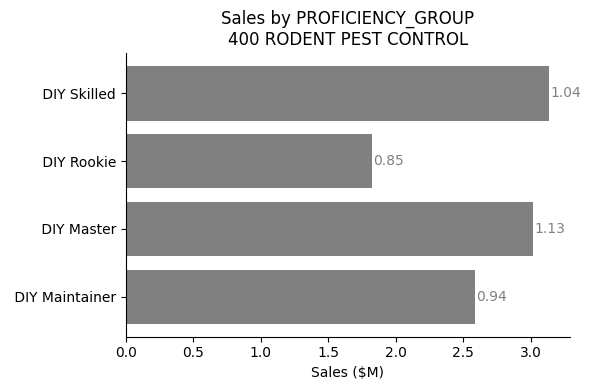

In [12]:
generate_segment_charts(df=PC_diy, field="PROFICIENCY_GROUP", level="ITEM_SUB_DEPARTMENT_NAME")

## RFM (Annual Segment)

In [13]:
# Get data
PC_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [14]:
# Check data
PC_rfm.head()

,ITEM_SUB_DEPARTMENT_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,High Spend High Frequency,1045679.25,46715.0,31508,1932103.20,90117.0,64248,26247395.94,2185628.0,...,1520717,0.541213,0.518382,0.490412,0.497800,0.478086,0.399118,1.087211,1.084285,1.228739
1,400 ANIMAL CONTROL,High Spend Low Frequency,345782.74,14898.0,10896,1932103.20,90117.0,64248,10045806.53,832041.0,...,1520717,0.178967,0.165318,0.169593,0.190525,0.182001,0.200958,0.939334,0.908336,0.843923
2,400 ANIMAL CONTROL,Low Spend High Frequency,291027.91,15649.0,11685,1932103.20,90117.0,64248,8130547.77,781012.0,...,1520717,0.150628,0.173652,0.181873,0.154201,0.170839,0.181163,0.976824,1.016464,1.003919
3,400 ANIMAL CONTROL,Low Spend Low Frequency,249613.30,12855.0,10159,1932103.20,90117.0,64248,8303085.96,772937.0,...,1520717,0.129193,0.142648,0.158122,0.157474,0.169073,0.218762,0.820407,0.843706,0.722804
4,400 CRAWLING PEST CONTROL,High Spend High Frequency,8116138.38,624712.0,293385,17138430.36,1365686.0,704043,26247395.94,2185628.0,...,1520717,0.473564,0.457435,0.416715,0.497800,0.478086,0.399118,0.951314,0.956803,1.044090


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

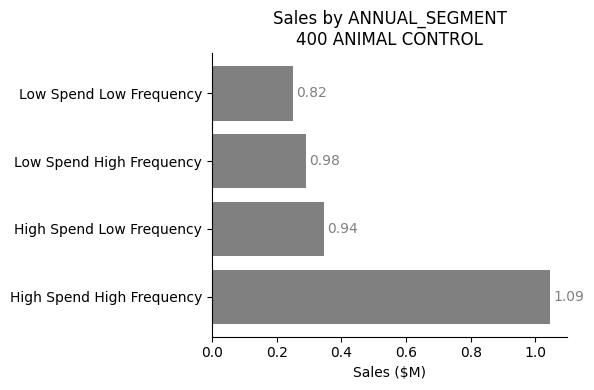

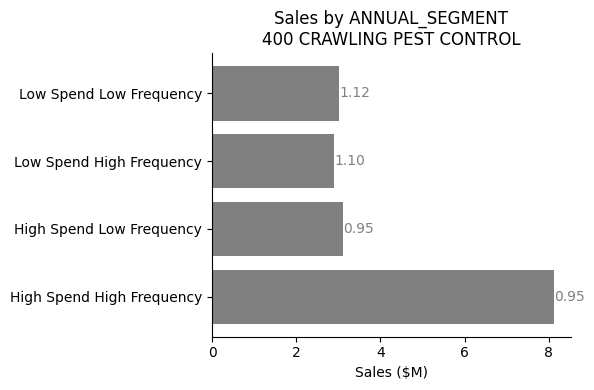

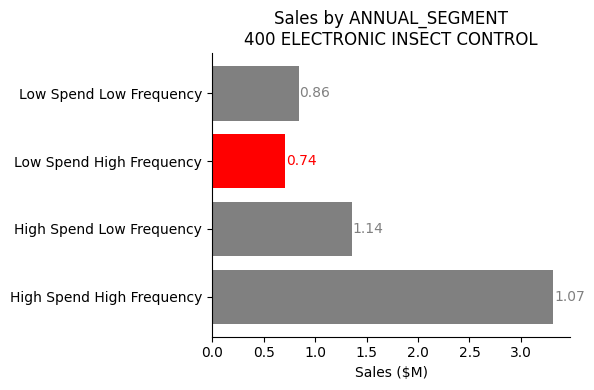

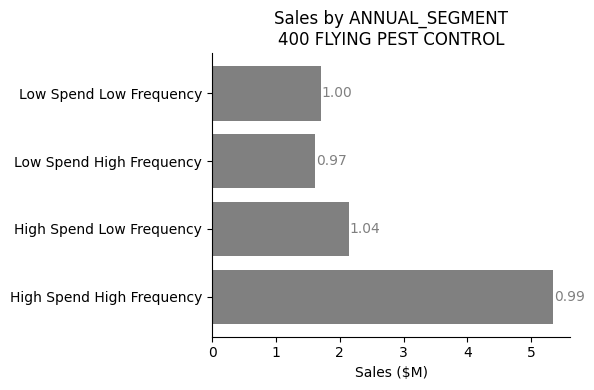

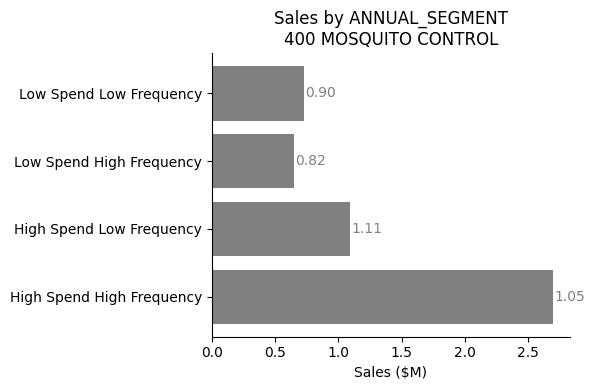

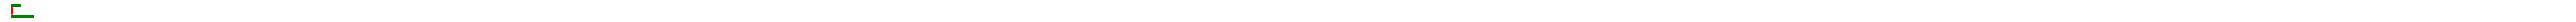

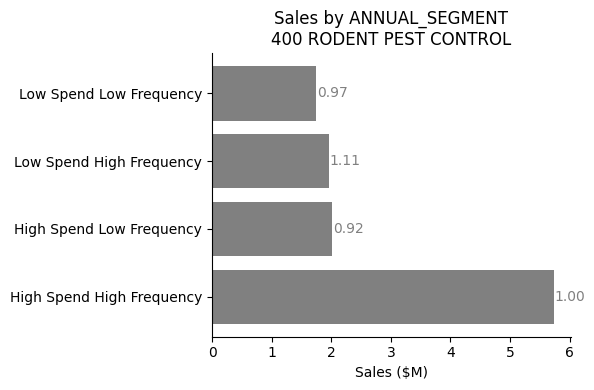

In [15]:
generate_segment_charts(df=PC_rfm, field="ANNUAL_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial BOT

In [16]:
# Get data
PC_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [17]:
# Check data
PC_bot.head()

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,B&O,463745.65,17214.0,11038,803271.73,30594.0,20332,14257330.61,1163751.0,...,472222,0.577321,0.562659,0.542888,0.554058,0.555996,0.518430,1.041987,1.011985,1.047177
1,400 ANIMAL CONTROL,Builder,108444.91,4132.0,2836,803271.73,30594.0,20332,3654932.52,292470.0,...,472222,0.135004,0.135059,0.139485,0.142035,0.139731,0.140267,0.950496,0.966565,0.994425
2,400 ANIMAL CONTROL,Trades,231066.96,9247.0,6457,803271.73,30594.0,20332,7818415.42,636748.0,...,472222,0.287657,0.302249,0.317578,0.303834,0.304214,0.341168,0.946760,0.993540,0.930855
3,400 ANIMAL CONTROL,Unknown,14.21,1.0,1,803271.73,30594.0,20332,1885.63,124.0,...,472222,0.000018,0.000033,0.000049,0.000073,0.000059,0.000136,0.241412,0.551735,0.360294
4,400 CRAWLING PEST CONTROL,B&O,4470082.87,360737.0,127932,8081389.66,637868.0,243943,14257330.61,1163751.0,...,472222,0.553133,0.565536,0.524434,0.554058,0.555996,0.518430,0.998331,1.017158,1.011581


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

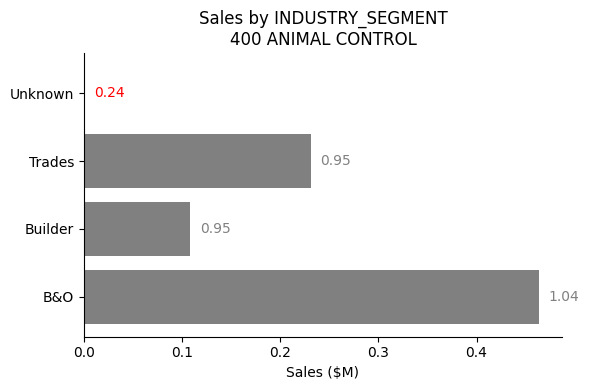

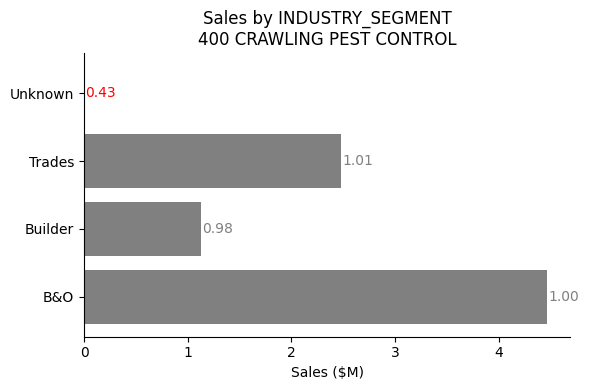

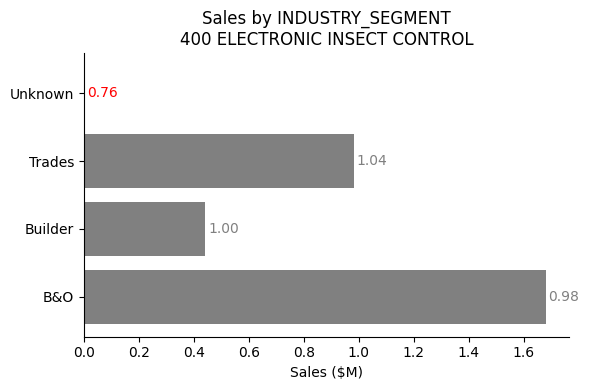

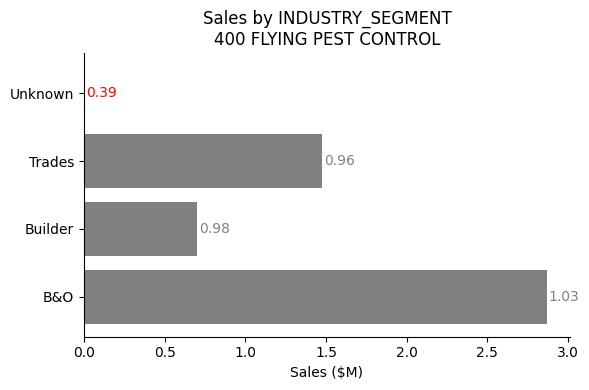

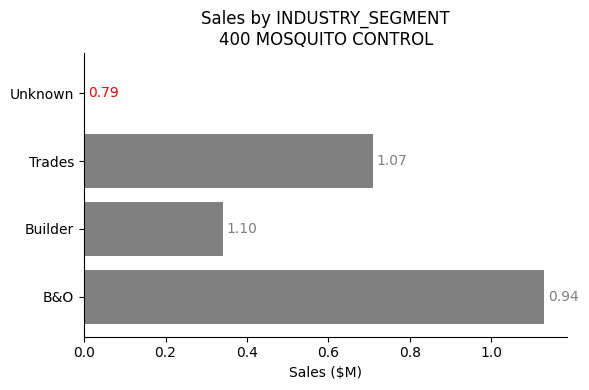

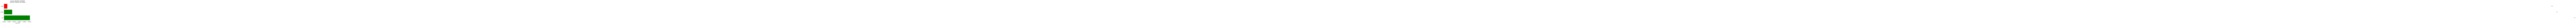

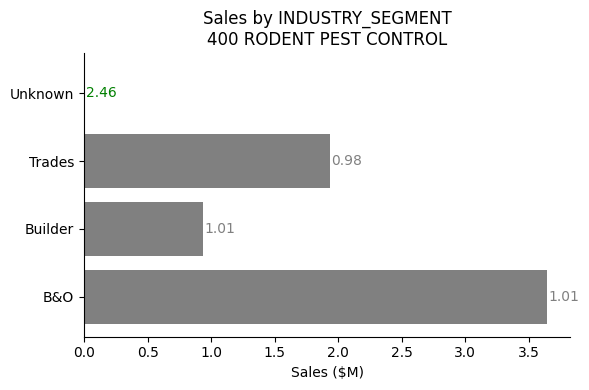

In [18]:
generate_segment_charts(df=PC_bot, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial Industry Segment

In [19]:
# Get data
PC_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [20]:
# Check data
PC_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
52,400 PEST CONTROL OFF RANGE,Commercial Builder,18.18,1.0,1,35.55,5.0,5,725774.04,57522.0,...,269384,0.511392,0.200000,0.200000,0.050540,0.049019,0.048154,10.118585,4.080060,4.153341
50,400 PEST CONTROL OFF RANGE,Accommodation and Food Services,10.91,1.0,1,35.55,5.0,5,1591150.91,135020.0,...,269384,0.306892,0.200000,0.200000,0.110801,0.115061,0.096984,2.769751,1.738211,2.062196
53,400 PEST CONTROL OFF RANGE,Landscaper and Gardening Services,6.37,2.0,2,35.55,5.0,5,1065915.11,86618.0,...,269384,0.179184,0.400000,0.400000,0.074226,0.073814,0.081839,2.414038,5.419040,4.887645
24,400 ELECTRONIC INSECT CONTROL,Electrical Services,197142.23,4853.0,2907,1742835.30,44394.0,27663,1291706.13,101999.0,...,269384,0.113116,0.109317,0.105086,0.089949,0.086921,0.092006,1.257554,1.257652,1.142165
5,400 ANIMAL CONTROL,Landscaper and Gardening Services,39673.10,1570.0,1033,440681.08,17074.0,11605,1065915.11,86618.0,...,269384,0.090027,0.091953,0.089013,0.074226,0.073814,0.081839,1.212875,1.245738,1.087660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,400 ELECTRONIC INSECT CONTROL,Cleaning Services,101514.96,2855.0,1880,1742835.30,44394.0,27663,938571.78,79053.0,...,269384,0.058247,0.064310,0.067961,0.065358,0.067367,0.070743,0.891196,0.954628,0.960675
0,400 ANIMAL CONTROL,Accommodation and Food Services,42120.50,1557.0,1098,440681.08,17074.0,11605,1591150.91,135020.0,...,269384,0.095580,0.091191,0.094614,0.110801,0.115061,0.096984,0.862630,0.792548,0.975563
25,400 ELECTRONIC INSECT CONTROL,Landscaper and Gardening Services,111097.12,2903.0,2023,1742835.30,44394.0,27663,1065915.11,86618.0,...,269384,0.063745,0.065392,0.073130,0.074226,0.073814,0.081839,0.858798,0.885901,0.893584
4,400 ANIMAL CONTROL,Electrical Services,31984.88,1324.0,961,440681.08,17074.0,11605,1291706.13,101999.0,...,269384,0.072581,0.077545,0.082809,0.089949,0.086921,0.092006,0.806907,0.892128,0.900039


In [21]:
generate_segment_charts(df=PC_is, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

KeyError: 'ITEM_CLASS_NAME'

## Drop item range table

In [ ]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_PC}
    )

# 400 GROWING MEDIA

## Data

In [ ]:
# Set item range table name
table_GM = 'GM_item_range' + datetime.today().strftime('%Y_%m_%d')

In [ ]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_GM,
                'filter' : "AND item_sub_department_name = '400 GROWING MEDIA' "})

## Demographic Segments (AU)

In [ ]:
GM_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [ ]:
# Check data
GM_ds.head()

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Homeowner older kids,95343.27,5026.0,2539,1156711.04,60566.0,30363,11704165.06,1370137.0,...,2588230,0.082426,0.082984,0.083622,0.072791,0.073861,0.074007,1.132362,1.123509,1.129920
1,500 COIR MULCH BLOCK HYDRO,Homeowner younger kids,182255.80,9618.0,4955,1156711.04,60566.0,30363,22054003.49,2612429.0,...,2588230,0.157564,0.158802,0.163192,0.137160,0.140831,0.141784,1.148761,1.127608,1.150990
2,500 COIR MULCH BLOCK HYDRO,Older homeowner,544058.84,27742.0,13308,1156711.04,60566.0,30363,87862988.40,10005621.0,...,2588230,0.470350,0.458046,0.438297,0.546443,0.539383,0.487792,0.860748,0.849203,0.898533
3,500 COIR MULCH BLOCK HYDRO,Renter no kids,82819.23,4639.0,2820,1156711.04,60566.0,30363,9113185.80,1084036.0,...,2588230,0.071599,0.076594,0.092876,0.056677,0.058438,0.103687,1.263272,1.310686,0.895734
4,500 COIR MULCH BLOCK HYDRO,Renter with kids,45328.37,2569.0,1607,1156711.04,60566.0,30363,5489698.28,677855.0,...,2588230,0.039187,0.042417,0.052926,0.034142,0.036542,0.065604,1.147777,1.160768,0.806750


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

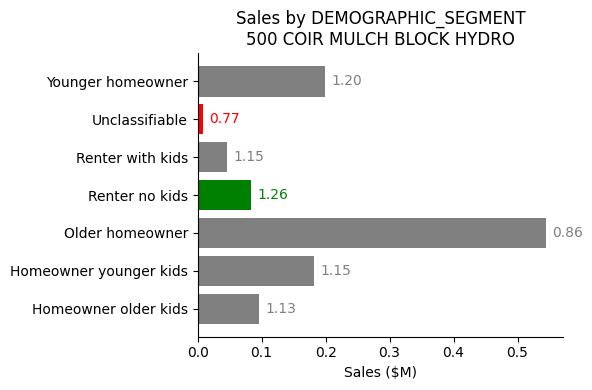

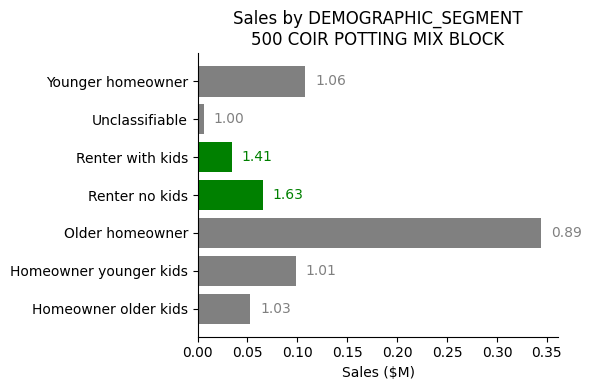

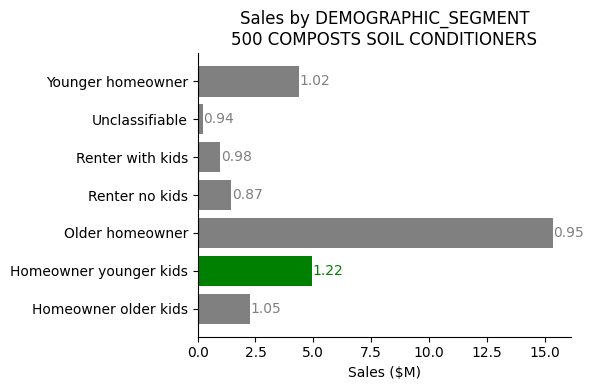

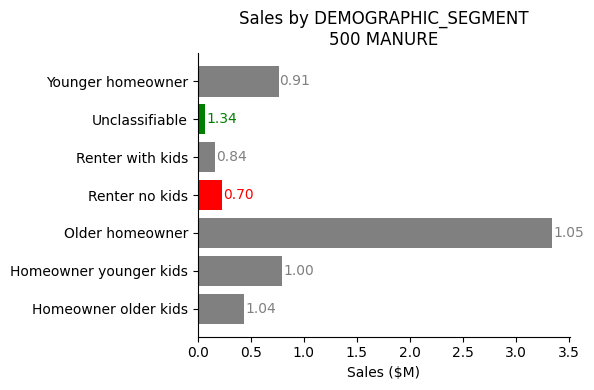

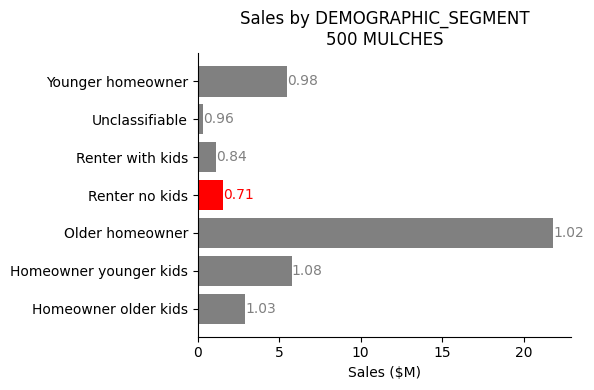

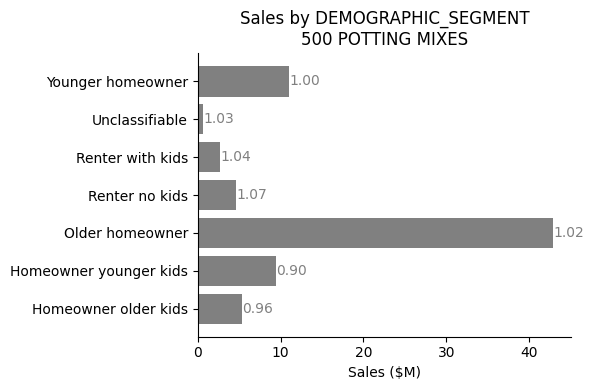

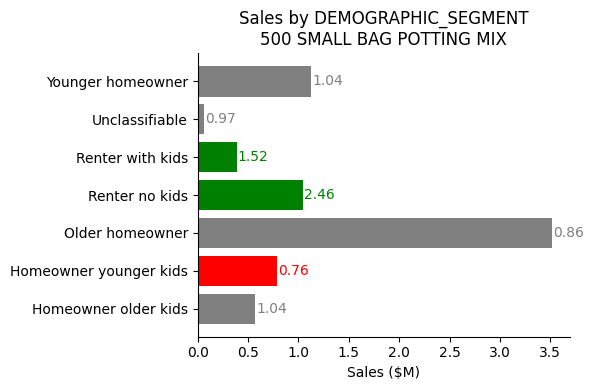

In [ ]:
generate_segment_charts(df=GM_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_CLASS_NAME")

## DIY

In [ ]:
# Get data
GM_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [ ]:
# Check data
GM_diy.head()

,ITEM_CLASS_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,DIY Maintainer,269006.09,13900.0,6898,1022261.35,53158.0,26196,39119141.87,4516379.0,...,2162845,0.263148,0.261485,0.263323,0.275301,0.276262,0.272817,0.955854,0.946508,0.965200
1,500 COIR MULCH BLOCK HYDRO,DIY Master,257506.60,13480.0,6234,1022261.35,53158.0,26196,29734448.96,3392752.0,...,2162845,0.251899,0.253584,0.237975,0.209257,0.207531,0.202174,1.203781,1.221906,1.177080
2,500 COIR MULCH BLOCK HYDRO,DIY Rookie,208858.19,10866.0,5939,1022261.35,53158.0,26196,33997670.76,3937888.0,...,2162845,0.204310,0.204409,0.226714,0.239259,0.240877,0.258620,0.853928,0.848607,0.876630
3,500 COIR MULCH BLOCK HYDRO,DIY Skilled,286890.47,14912.0,7125,1022261.35,53158.0,26196,39244391.39,4501135.0,...,2162845,0.280643,0.280522,0.271988,0.276183,0.275330,0.266388,1.016149,1.018859,1.021022
4,500 COIR POTTING MIX BLOCK,DIY Maintainer,170066.19,20107.0,11553,622168.46,74128.0,42715,39119141.87,4516379.0,...,2162845,0.273344,0.271247,0.270467,0.275301,0.276262,0.272817,0.992891,0.981846,0.991386


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

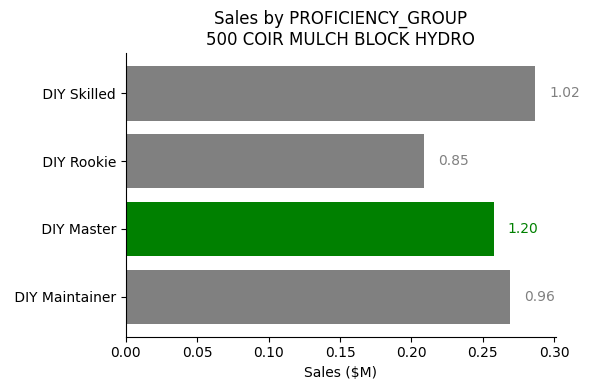

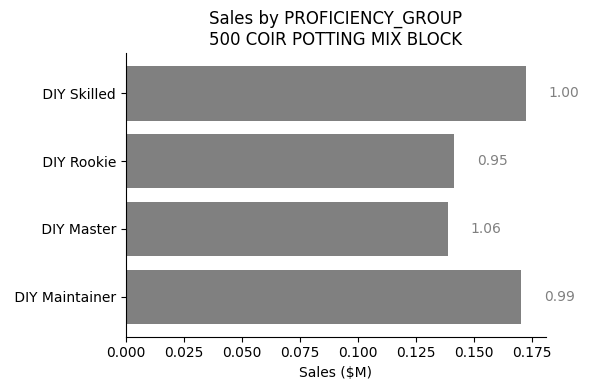

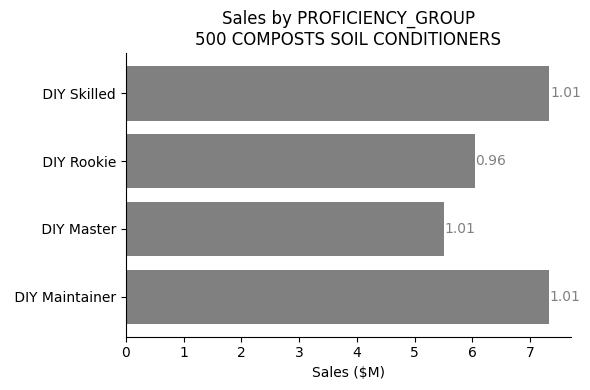

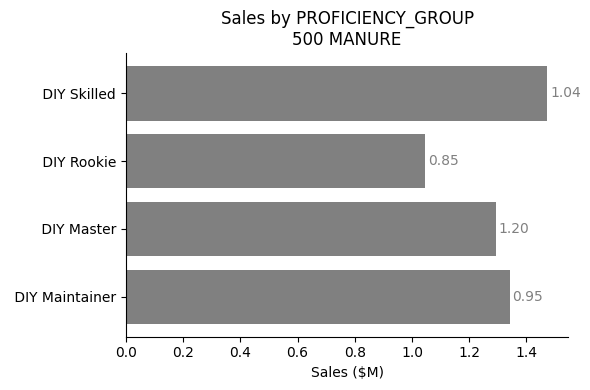

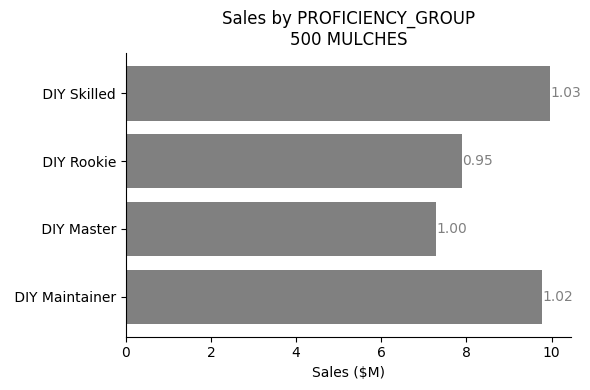

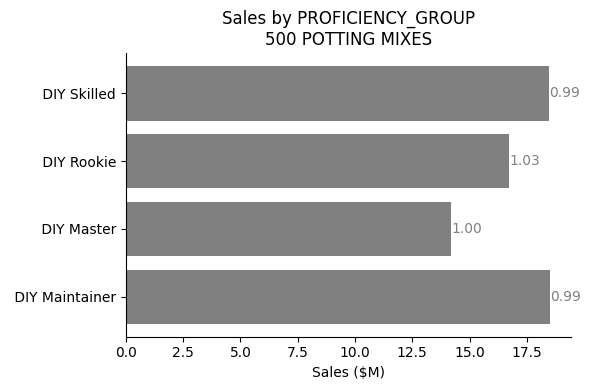

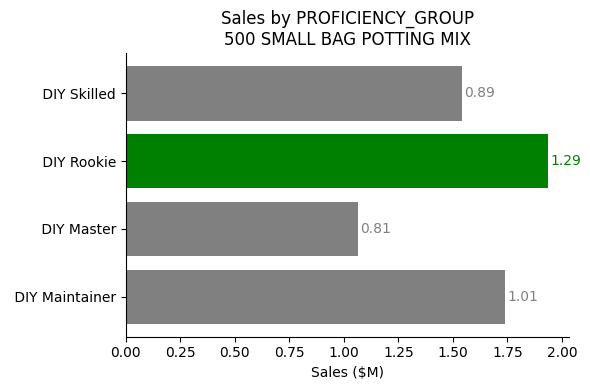

In [ ]:
generate_segment_charts(df=GM_diy, field="PROFICIENCY_GROUP", level="ITEM_CLASS_NAME")

## RFM (Annual Segment)

In [ ]:
# Get data
GM_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [ ]:
# Check data
GM_rfm.head()

,ITEM_CLASS_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,High Spend High Frequency,677632.40,34894.0,15264,1127614.55,58908.0,29366,82017130.89,9229105.0,...,2432442,0.600943,0.592347,0.519785,0.524964,0.512296,0.359388,1.144732,1.156261,1.446306
1,500 COIR MULCH BLOCK HYDRO,High Spend Low Frequency,194031.77,10153.0,5552,1127614.55,58908.0,29366,26560687.12,2977762.0,...,2432442,0.172073,0.172354,0.189062,0.170006,0.165292,0.213178,1.012157,1.042723,0.886874
2,500 COIR MULCH BLOCK HYDRO,Low Spend High Frequency,144112.29,7732.0,4453,1127614.55,58908.0,29366,26475341.67,3238628.0,...,2432442,0.127803,0.131256,0.151638,0.169460,0.179772,0.184710,0.754178,0.730122,0.820952
3,500 COIR MULCH BLOCK HYDRO,Low Spend Low Frequency,111838.09,6129.0,4097,1127614.55,58908.0,29366,21180583.74,2569696.0,...,2432442,0.099181,0.104044,0.139515,0.135570,0.142641,0.242724,0.731587,0.729411,0.574789
4,500 COIR POTTING MIX BLOCK,High Spend High Frequency,362484.69,42003.0,22622,687156.02,81853.0,47495,82017130.89,9229105.0,...,2432442,0.527514,0.513152,0.476303,0.524964,0.512296,0.359388,1.004858,1.001671,1.325317


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

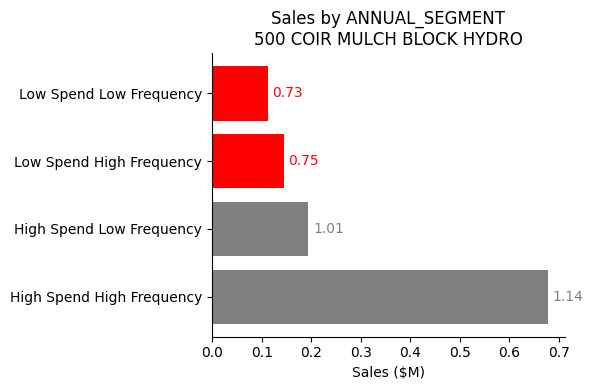

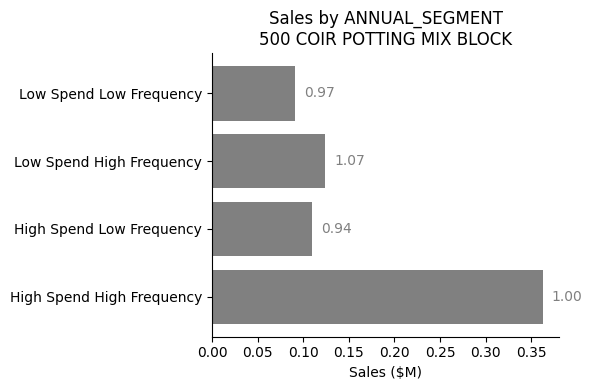

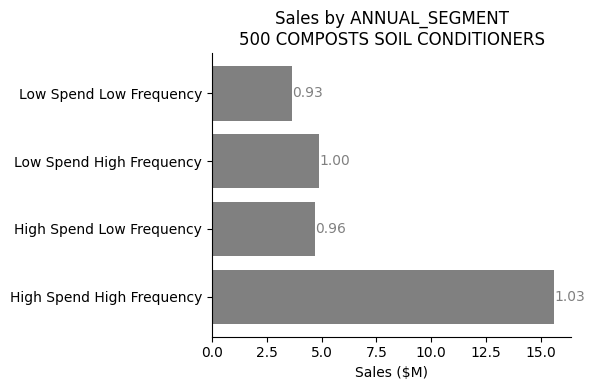

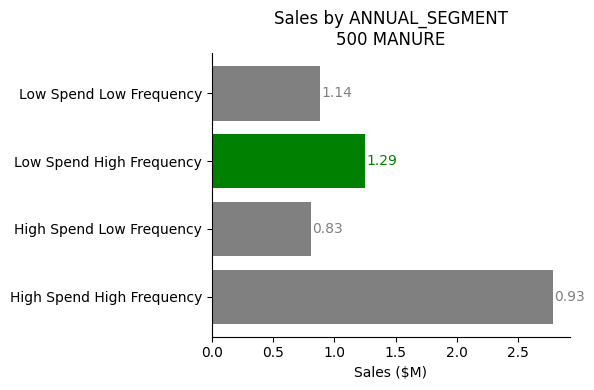

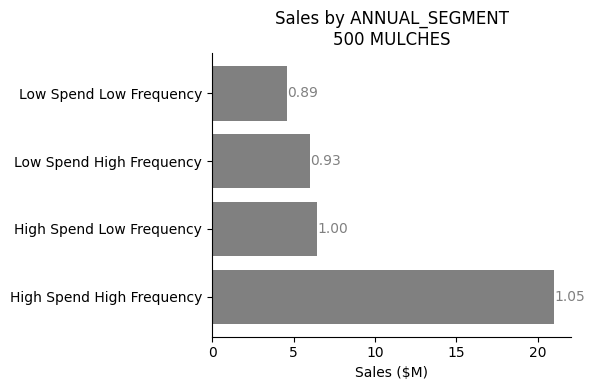

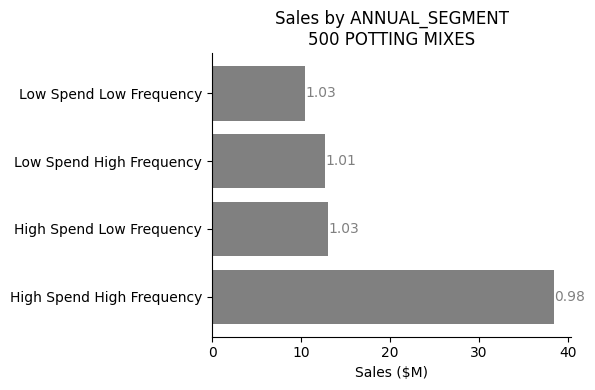

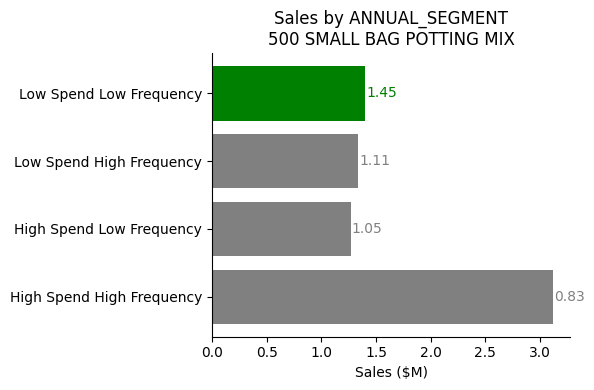

In [ ]:
generate_segment_charts(df=GM_rfm, field="ANNUAL_SEGMENT", level="ITEM_CLASS_NAME") 

## Commercial BOT

In [ ]:
# Get data
GM_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [ ]:
# Check data
GM_bot.head()

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,B&O,272133.73,15419.0,5517,459377.11,26421.0,9776,27191880.12,3112151.0,...,532925,0.592397,0.583589,0.564341,0.541231,0.541573,0.526798,1.094537,1.077580,1.071266
1,500 COIR MULCH BLOCK HYDRO,Builder,47385.61,2807.0,1102,459377.11,26421.0,9776,6505013.52,737923.0,...,532925,0.103152,0.106241,0.112725,0.129477,0.128413,0.133405,0.796683,0.827343,0.844983
2,500 COIR MULCH BLOCK HYDRO,Trades,139857.77,8195.0,3157,459377.11,26421.0,9776,16543212.18,1896346.0,...,532925,0.304451,0.310170,0.322934,0.329278,0.330000,0.339759,0.924601,0.939908,0.950480
3,500 COIR POTTING MIX BLOCK,B&O,130580.25,16323.0,7769,217925.27,27221.0,13330,27191880.12,3112151.0,...,532925,0.599197,0.599647,0.582821,0.541231,0.541573,0.526798,1.107102,1.107232,1.106346
4,500 COIR POTTING MIX BLOCK,Builder,23783.84,2921.0,1461,217925.27,27221.0,13330,6505013.52,737923.0,...,532925,0.109138,0.107307,0.109602,0.129477,0.128413,0.133405,0.842913,0.835641,0.821573


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

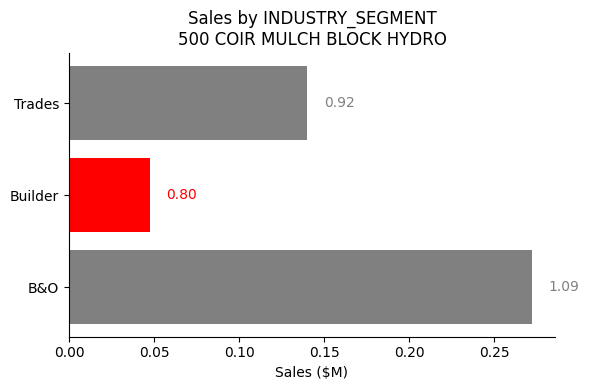

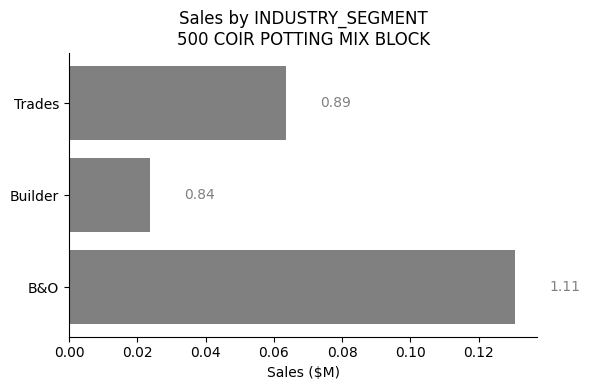

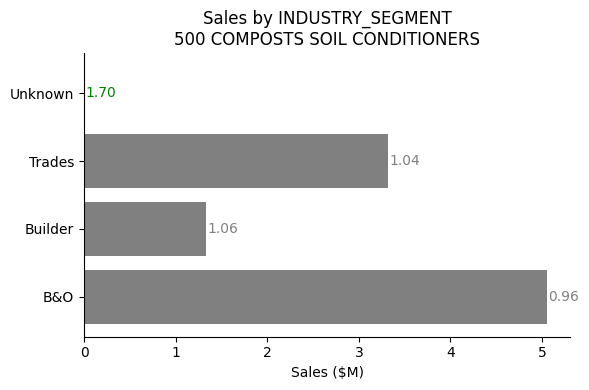

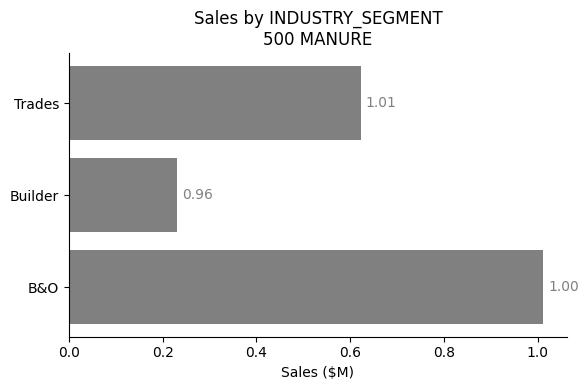

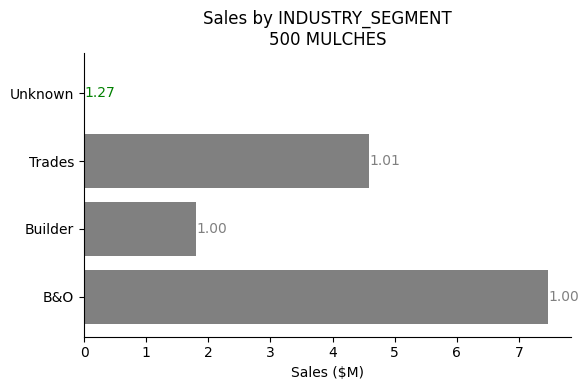

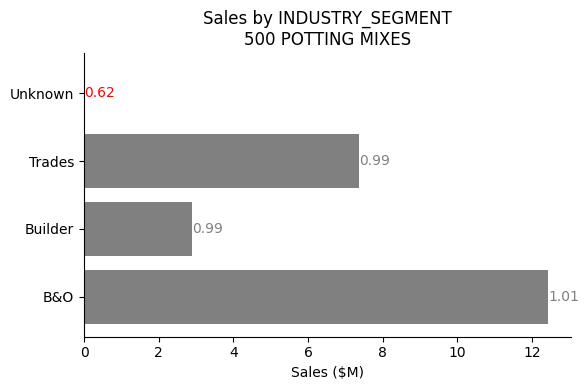

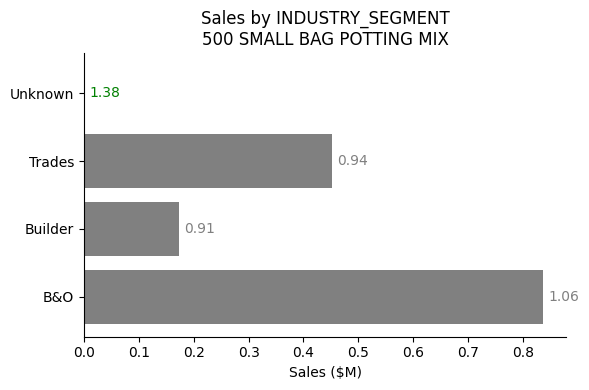

In [ ]:
generate_segment_charts(df=GM_bot, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Commercial Industry Segment

In [ ]:
# Get data
GM_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [ ]:
# Check data
GM_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
1,500 COIR MULCH BLOCK HYDRO,Agriculture Forestry and Fishing,25555.01,1785.0,307,417293.70,23940.0,8899,1150337.75,122405.0,...,487602,0.061240,0.074561,0.034498,0.024933,0.023238,0.026040,2.456178,3.208557,1.324808
72,500 COMPOSTS SOIL CONDITIONERS,Unknown,237.42,30.0,5,8879530.53,1263934.0,189195,724.02,80.0,...,487602,0.000027,0.000024,0.000026,0.000016,0.000015,0.000041,1.703836,1.562794,0.634146
25,500 COIR POTTING MIX BLOCK,Agriculture Forestry and Fishing,7204.34,864.0,426,201247.90,25123.0,12263,1150337.75,122405.0,...,487602,0.035798,0.034391,0.034739,0.024933,0.023238,0.026040,1.435782,1.479919,1.334063
46,500 COIR POTTING MIX BLOCK,Sports Recreation Arts and Media Services,6895.01,904.0,364,201247.90,25123.0,12263,1141307.01,129778.0,...,487602,0.034261,0.035983,0.029683,0.024737,0.024638,0.025094,1.385007,1.460464,1.182872
171,500 SMALL BAG POTTING MIX,Unknown,29.02,4.0,4,1335882.65,159308.0,82075,724.02,80.0,...,487602,0.000022,0.000025,0.000049,0.000016,0.000015,0.000041,1.384298,1.653207,1.195122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,500 COMPOSTS SOIL CONDITIONERS,Agriculture Forestry and Fishing,151449.32,22125.0,3686,8879530.53,1263934.0,189195,1150337.75,122405.0,...,487602,0.017056,0.017505,0.019483,0.024933,0.023238,0.026040,0.684074,0.753277,0.748195
13,500 COIR MULCH BLOCK HYDRO,Painting and Decorating Services,4415.39,271.0,146,417293.70,23940.0,8899,715981.56,85305.0,...,487602,0.010581,0.011320,0.016406,0.015519,0.016195,0.019510,0.681831,0.698981,0.840902
4,500 COIR MULCH BLOCK HYDRO,Commercial Builder,7722.71,463.0,211,417293.70,23940.0,8899,1266407.08,143328.0,...,487602,0.018507,0.019340,0.023711,0.027449,0.027210,0.028066,0.674226,0.710756,0.844830
19,500 COIR MULCH BLOCK HYDRO,Residential Builder,13893.83,771.0,338,417293.70,23940.0,8899,2295898.79,259882.0,...,487602,0.033295,0.032206,0.037982,0.049762,0.049338,0.051743,0.669081,0.652753,0.734051


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

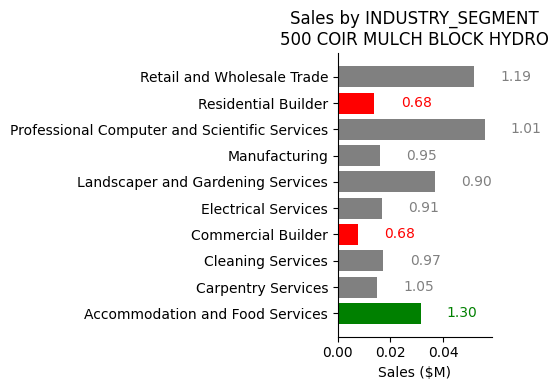

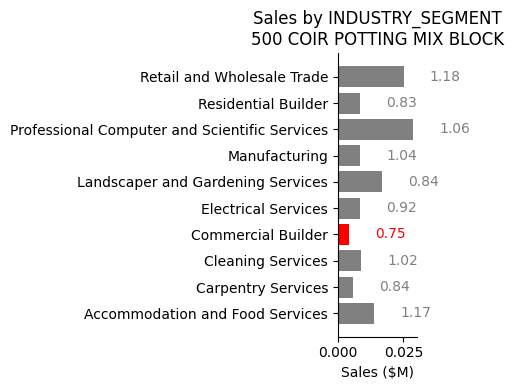

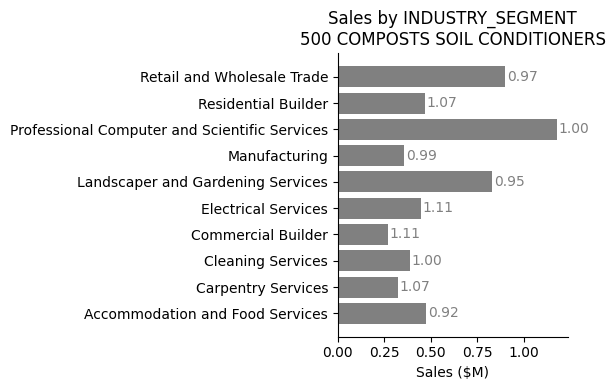

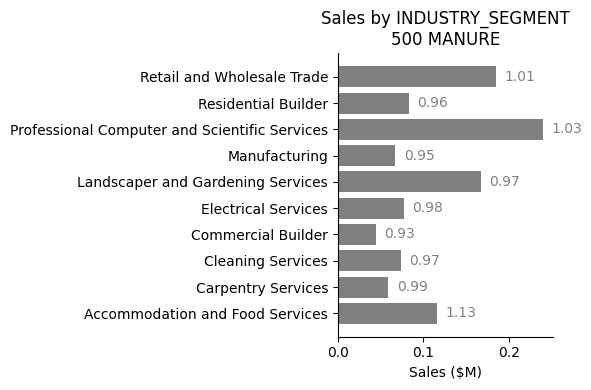

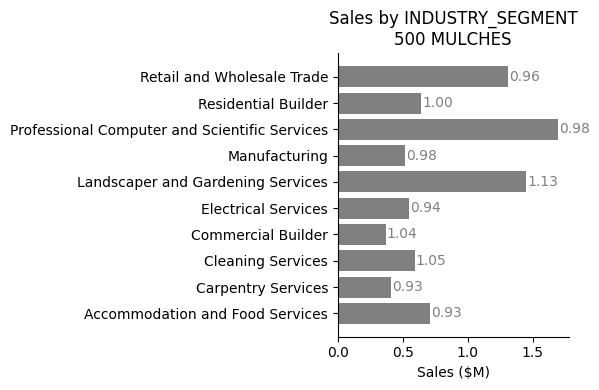

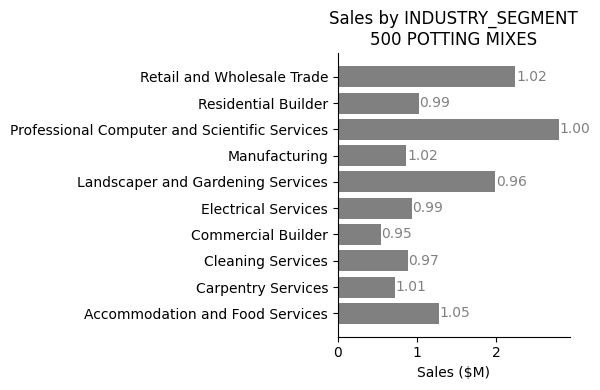

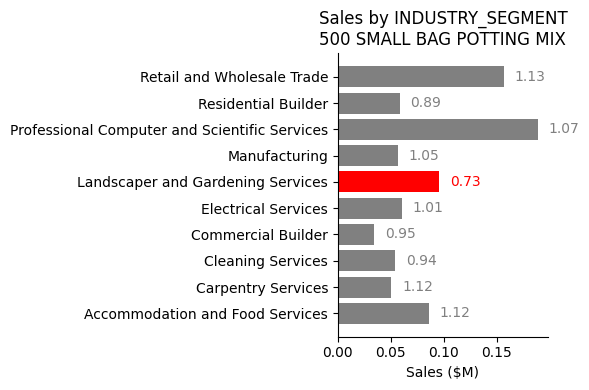

In [ ]:
generate_segment_charts(df=GM_is, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Drop item range table

In [ ]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_GM}
    )